In [1]:
import tessreduce as tr
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

fig_width_pt = 240.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

made reference
made source mask
calculating background
background subtracted
aligning images
!!Re-running for difference image!!
shifting images
remade mask
background
background correlation correction
field calibration
target is above -30 dec, calibrating to PS1 photometry.


<IPython.core.display.Javascript object>


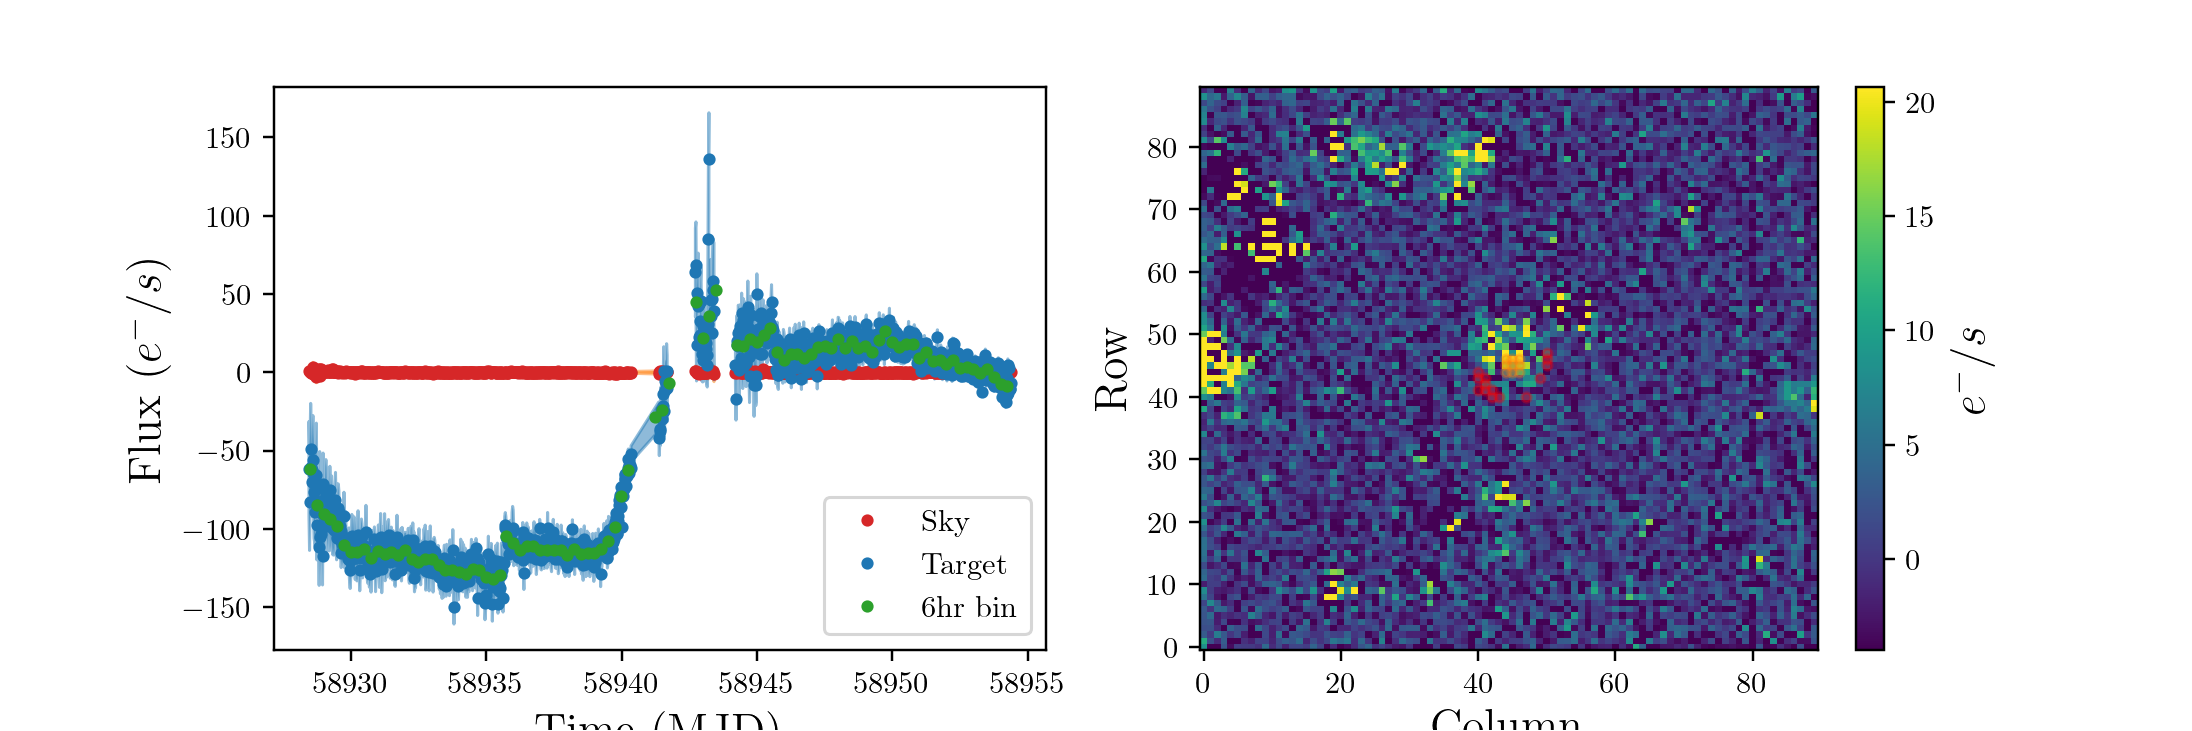

In [2]:
tess = tr.tessreduce(tpf='../../../../data/tess/2020fqv.fits',reduce=True)

<IPython.core.display.Javascript object>


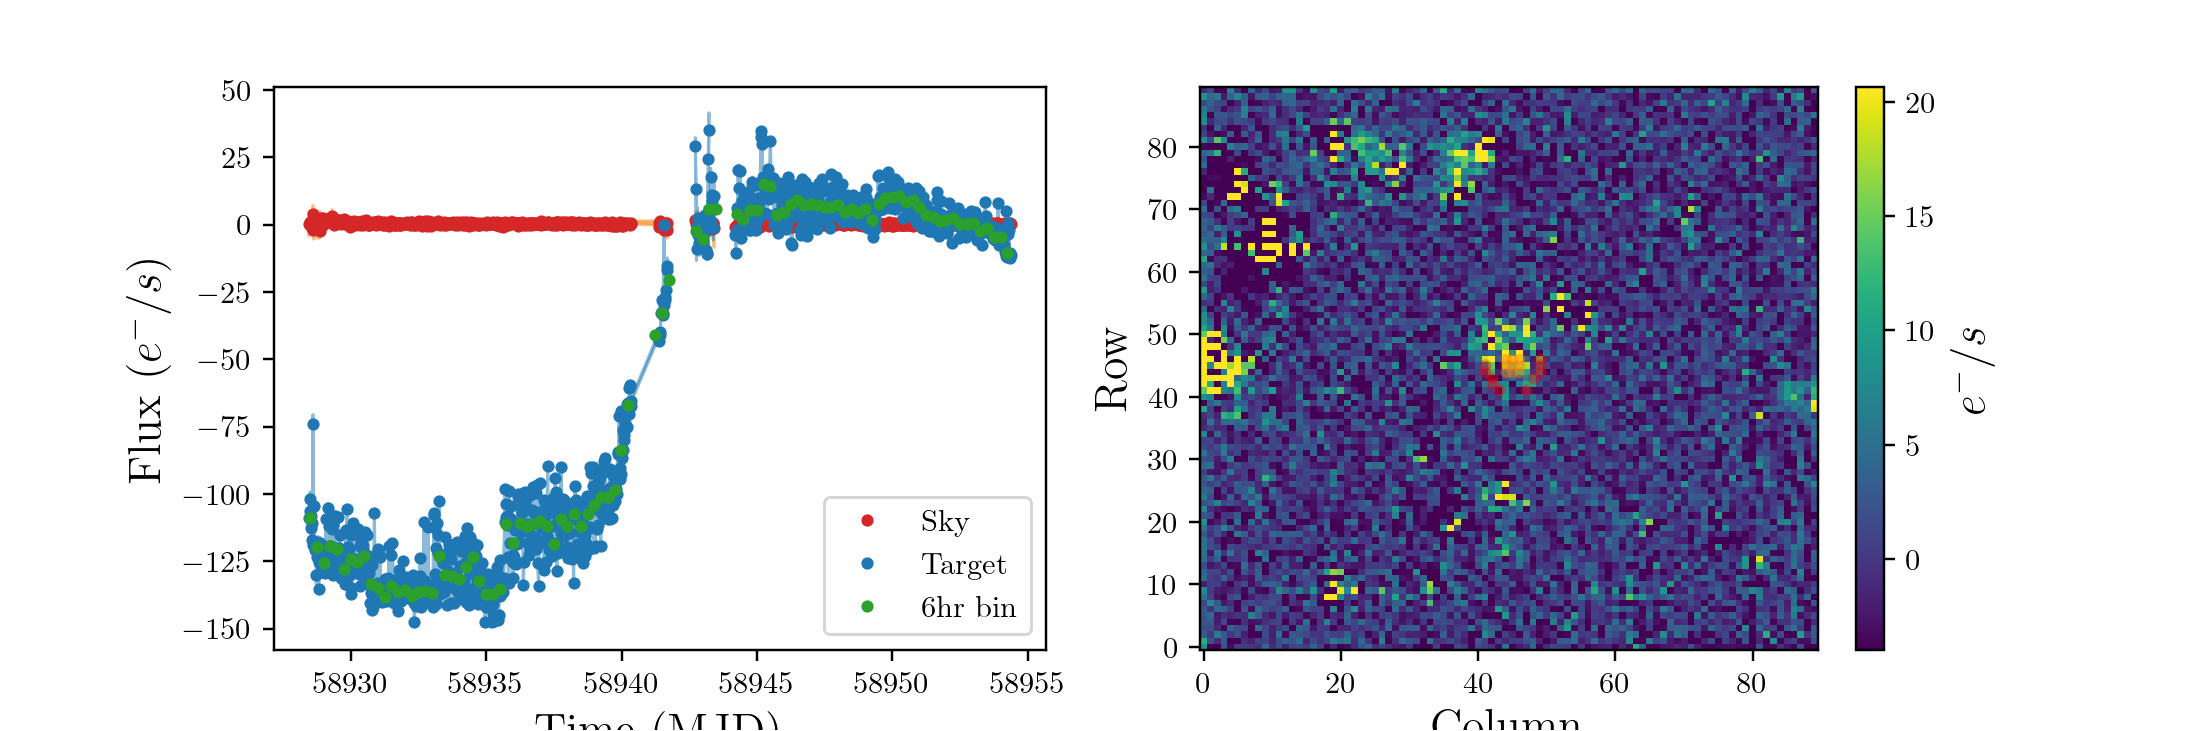

In [8]:
tess.diff_lc(phot_method='psf',plot=True);

<IPython.core.display.Javascript object>


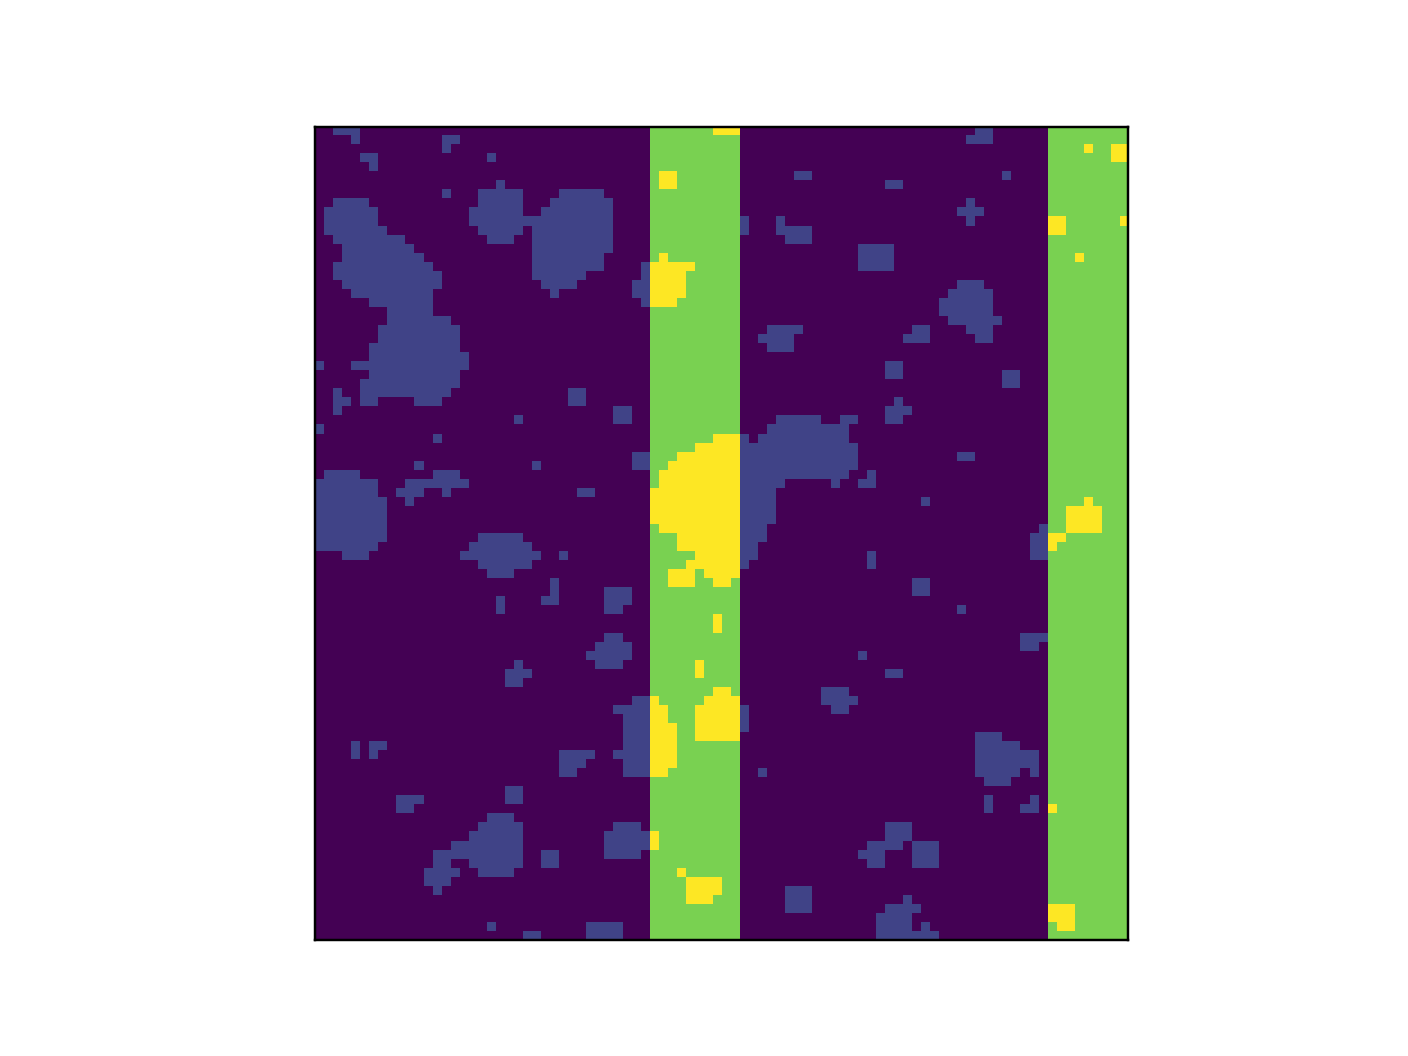

In [14]:
plt.figure()
plt.imshow(tess.mask,origin='lower')
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False, 
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off
plt.savefig('fqv_mask.pdf', bbox_inches = "tight")

<IPython.core.display.Javascript object>


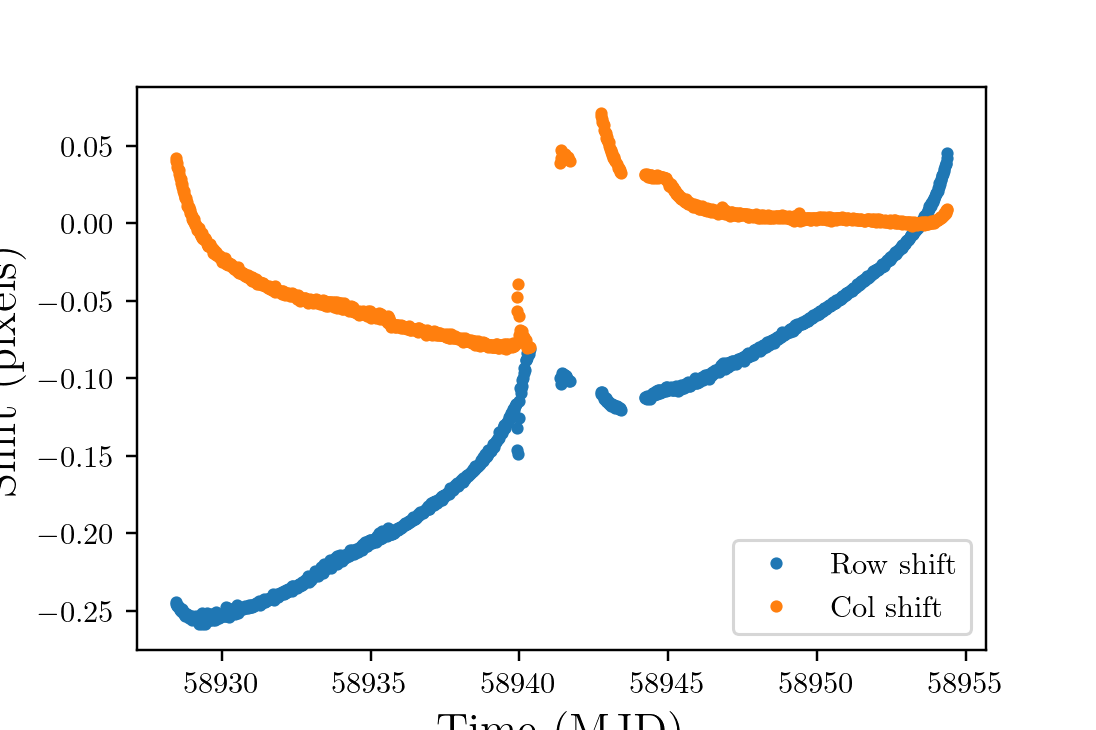

In [9]:
import numpy as np
fig_width_pt = 240.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27			   # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0		 # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
plt.figure(figsize=(1.5*fig_width,1*fig_width))
plt.plot(tess.lc[0],tess.shift[:,0],'.',label='Row shift')
plt.plot(tess.lc[0],tess.shift[:,1],'.',label='Col shift')
plt.ylabel('Shift (pixels)',fontsize=15)
plt.xlabel('Time (MJD)',fontsize=15)
plt.legend()

In [3]:
import matplotlib.patheffects as PathEffects

<IPython.core.display.Javascript object>


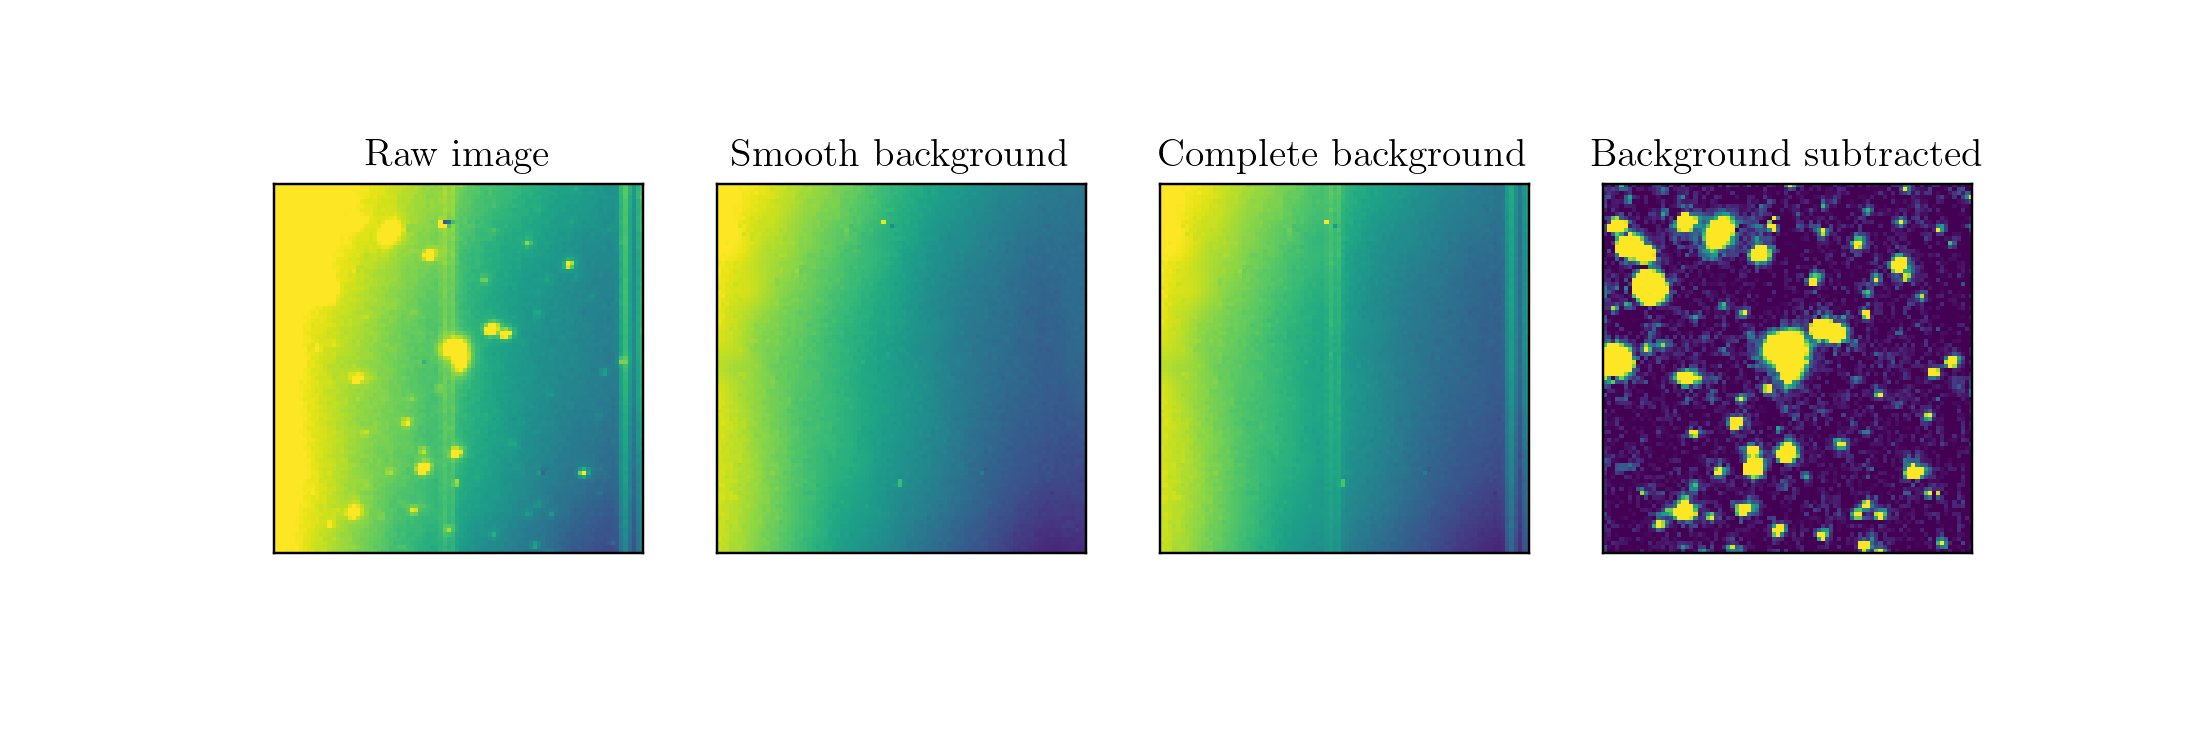

In [6]:
plt.figure(figsize=(3*fig_width,1*fig_width))
plt.subplot(141)
plt.imshow(tess.tpf.flux.value[700],origin='lower',vmin=8000,vmax=9000)
#plt.ylabel('Row',fontsize=15)
#plt.xlabel('Column',fontsize=15)
plt.title('Raw image',fontsize=13)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False, 
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off
#plt.annotate("a)", (10, 75),
#                       size=20, ha="center",color='w', path_effects=[PathEffects.withStroke(linewidth=.5,
#                                                                                  foreground="k")])
plt.subplot(142)
#plt.imshow(tess.bkg[700]/tess.qe[700],origin='lower',vmin=8000,vmax=9000)
plt.imshow(tess.bkg[700],origin='lower',vmin=8000,vmax=9000)
#plt.xlabel('Column',fontsize=15)
plt.title('Smooth background',fontsize=13)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False, 
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off

plt.subplot(143)
plt.imshow(tess.bkg[700]*tess.qe[700],origin='lower',vmin=8000,vmax=9000)
#plt.xlabel('Column',fontsize=15)
plt.title('Complete background',fontsize=13)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False, 
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off

plt.subplot(144)
plt.imshow(tess.flux[700]+tess.ref,origin='lower',vmin=0,vmax=50)
#plt.xlabel('Column',fontsize=15)
plt.title('Background subtracted',fontsize=13)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False, 
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off
plt.savefig('background_example_fqv.pdf', bbox_inches = "tight")